### Import libraries

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.spatial.distance as sdist
import sklearn.cluster as cluster

### Loading data

In [2]:
data  = pd.read_excel('../data/Week1_challenge_data_source.xlsx', na_values=['?', None])
data.head(5)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [3]:
# column names
list(data.columns)

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [4]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 150001 rows and 55 columns


### Handling Missing Values

In [5]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(data)

The dataset contains 12.49 % missing values.


In [6]:
# Which column(s) has missing values
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# fill missing with ffill method for columns (Bearer Id, MSISDN/Number, IMSI)
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

data['Bearer Id'] = fix_missing_ffill(data, 'Bearer Id')
data['MSISDN/Number'] = fix_missing_ffill(data, 'MSISDN/Number')
data['MSISDN/Number'] = fix_missing_ffill(data, 'IMSI')

In [8]:
# drop columns with more than 30% missing values and values which are zero
data = data.drop(['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 
                    'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B',  'Nb of sec with 6250B < Vol UL < 37500B',
                    ], axis=1)
data = data.dropna(subset=['End'])
data.shape

(150000, 45)

In [9]:
# summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150000 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            150000 non-null  float64       
 7   MSISDN/Number                   150000 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

In [10]:
data.fillna(data.mean(), inplace = True) #  fill nann column with mode 

In [11]:
# summary of a DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150000 non-null  object        
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            150000 non-null  float64       
 7   MSISDN/Number                   150000 non-null  float64       
 8   IMEI                            150000 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150000 non-null  float64

In [12]:
# change data type and formats
data['Bearer Id'] = data['Bearer Id'].astype('str')

data['MSISDN/Number'] = data['MSISDN/Number'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['IMSI'] = data['IMSI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['IMEI'] = data['IMEI'].apply(lambda x: '{:.0f}'.format(x)).astype('str')

data['Start']=pd.to_datetime(data['Start'])
data['End']=pd.to_datetime(data['End'])

data['Handset Manufacturer'] = data['Handset Manufacturer'].astype('str')
data['Last Location Name'] = data['Last Location Name'].astype('str')

data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,208201448079117,35521209507511,9164566995485190,42.000000,5.000000,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,208201909211140,35794009006359,L77566A,65.000000,5.000000,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,208200314458056,35281510359387,D42335A,109.795706,17.662883,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,208201402342131,35356610164913,T21824A,109.795706,17.662883,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,208201401415120,35407009745539,D88865A,109.795706,17.662883,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Top 10 handsets used by the customers

In [13]:
top10_handsets_customers = data[['Handset Type','IMSI']].groupby(['Handset Type'])
#top10 = data.sort_values(['Handset Type','IMSI'], ascending=False).groupby('Handset Type')
top10_handsets_customers = top10_handsets_customers['IMSI'].nunique()
top10_handsets_customers = top10_handsets_customers.reset_index(name='Total')
top10_handsets_customers = top10_handsets_customers.sort_values(['Total'], ascending=False)
top10_handsets_customers.head(10)

,Handset Type,Total
316,Huawei B528S-23A,10638
53,Apple iPhone 6S (A1688),6765
1395,undefined,6716
49,Apple iPhone 6 (A1586),6271
59,Apple iPhone 7 (A1778),4721
73,Apple iPhone Se (A1723),3764
66,Apple iPhone 8 (A1905),3550
955,Samsung Galaxy S8 (Sm-G950F),3275
78,Apple iPhone Xr (A2105),3077
888,Samsung Galaxy J5 (Sm-J530),2760


### top 3 handset manufacturers

In [14]:
top3_handset_manufacturers = data[['Handset Manufacturer','IMSI']].groupby(['Handset Manufacturer'])
top3_handset_manufacturers = top3_handset_manufacturers['IMSI'].nunique().nlargest(3).reset_index()
top3_handset_manufacturers

,Handset Manufacturer,IMSI
0,Apple,42684
1,Samsung,30980
2,Huawei,21742


### top 5 handset manfacturer for Apple

In [15]:
Apple_handsets = data[data['Handset Manufacturer']=='Apple']
Apple_handsets = Apple_handsets.groupby(['Handset Type'])['IMSI']
Apple_handsets = Apple_handsets.nunique().nlargest(5).reset_index()
Apple_handsets

,Handset Type,IMSI
0,Apple iPhone 6S (A1688),6765
1,Apple iPhone 6 (A1586),6271
2,Apple iPhone 7 (A1778),4721
3,Apple iPhone Se (A1723),3764
4,Apple iPhone 8 (A1905),3550


### top 5 handset manfacturer for Huawei

In [16]:
Huawei_handsets = data[data['Handset Manufacturer']=='Huawei']
Huawei_handsets = Huawei_handsets.groupby(['Handset Type'])['IMSI']
Huawei_handsets = Huawei_handsets.nunique().nlargest(5).reset_index()
Huawei_handsets

,Handset Type,IMSI
0,Huawei B528S-23A,10638
1,Huawei P20 Lite Huawei Nova 3E,1534
2,Huawei E5180,1185
3,Huawei P20,1110
4,Huawei Y6 2018,757


### top 5 handset manfacturer for Samsung

In [17]:
Samsung_handset = data[data['Handset Manufacturer']=='Samsung']
Samsung_handset = Samsung_handset.groupby(['Handset Type'])['IMSI']
Samsung_handset = Samsung_handset.nunique().nlargest(5).reset_index()
Samsung_handset

,Handset Type,IMSI
0,Samsung Galaxy S8 (Sm-G950F),3275
1,Samsung Galaxy J5 (Sm-J530),2760
2,Samsung Galaxy A5 Sm-A520F,2721
3,Samsung Galaxy J3 (Sm-J330),2606
4,Samsung Galaxy S7 (Sm-G930X),2310


### number of xDR sessions

In [18]:
number_of_xDR_sessions = data.groupby('MSISDN/Number')
number_of_xDR_sessions.agg({"Bearer Id": "count"})

,Bearer Id
MSISDN/Number,
204047108489451,1
204080810288647,1
208200101016140,1
208200101127285,1
208200101148045,2
...,...
208209850788090,1
208209850788245,1
208209850788283,1


### Session duration

In [19]:
session_duration = data.groupby('MSISDN/Number')
session_duration.agg({"Dur. (ms)": "sum"})

,Dur. (ms)
MSISDN/Number,
204047108489451,869844.0
204080810288647,877385.0
208200101016140,86019.0
208200101127285,86254.0
208200101148045,573923.0
...,...
208209850788090,127367.0
208209850788245,168543.0
208209850788283,86399.0


### the total download (DL) and upload (UL) data

In [20]:
total_DL_UL = data.groupby(['MSISDN/Number'])['Total UL (Bytes)', 'Total DL (Bytes)'].sum()
total_DL_UL.head(5)

,Total UL (Bytes),Total DL (Bytes)
MSISDN/Number,,
204047108489451,60456049.0,78697597.0
204080810288647,37295915.0,194828056.0
208200101016140,53794658.0,31376981.0
208200101127285,33583272.0,392918313.0
208200101148045,71325004.0,961767023.0


##### upper and lower boundries

In [21]:
"""
calculate the boundaries outside which sit the outliers
for a Gaussian distribution
"""
def normal_boundaries(df, variable, distance):
    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()
    return upper_boundary, lower_boundary

In [ ]:
# Upper and lower limits of duration
dur_upper_limit, dur_lower_limit = normal_boundaries(data, 'Dur. (ms)', 1.5)
dur_upper_limit, dur_lower_limit

In [ ]:
# Replacing the outliers by the maximum and minimum limit
data['Dur. (ms)']= np.where(data['Dur. (ms)'] > dur_upper_limit, dur_upper_limit,\
                       np.where(data['Dur. (ms)'] < dur_lower_limit, dur_lower_limit, data['Dur. (ms)']))

In [ ]:
# Session duration session for each customer
data.rename(columns = {'Dur. (ms).1':'dur'}, inplace = True)
 = grouped_data.agg({'dur': ['count','mean','median','std','' 'min', 'max','quantile']})
X

### Total data volume

In [22]:
x = data['Total_data'] = data['Total UL (Bytes)'] + data['Total DL (Bytes)']
x.describe()

count    1.500000e+05
mean     4.957646e+08
std      2.443818e+08
min      2.895611e+07
25%      2.844759e+08
50%      4.968611e+08
75%      7.065059e+08
max      9.559848e+08
dtype: float64

In [23]:
grouped_data= data.groupby('MSISDN/Number')
grouped_data.agg('Total_data').describe()

,count,mean,std,min,25%,50%,75%,max
MSISDN/Number,,,,,,,,
204047108489451,1.0,139153646.0,NaN,139153646.0,1.391536e+08,139153646.0,1.391536e+08,139153646.0
204080810288647,1.0,232123971.0,NaN,232123971.0,2.321240e+08,232123971.0,2.321240e+08,232123971.0
208200101016140,1.0,85171639.0,NaN,85171639.0,8.517164e+07,85171639.0,8.517164e+07,85171639.0
208200101127285,1.0,426501585.0,NaN,426501585.0,4.265016e+08,426501585.0,4.265016e+08,426501585.0
208200101148045,2.0,516546013.5,3.028714e+08,302383589.0,4.094648e+08,516546013.5,6.236272e+08,730708438.0
...,...,...,...,...,...,...,...,...
208209850788090,1.0,722703585.0,NaN,722703585.0,7.227036e+08,722703585.0,7.227036e+08,722703585.0
208209850788245,1.0,495865571.0,NaN,495865571.0,4.958656e+08,495865571.0,4.958656e+08,495865571.0
208209850788283,1.0,338180591.0,NaN,338180591.0,3.381806e+08,338180591.0,3.381806e+08,338180591.0


In [27]:
# total data
def total_data(df):
    cols = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
            'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 
            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
            'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']
    df['Social Media'] = df[cols[0]] + df[cols[1]]
    df['Google'] = df[cols[2]] + df[cols[3]]
    df['Email'] = df[cols[4]] + df[cols[5]]
    df['Youtube'] = df[cols[6]] + df[cols[7]]
    df['Netflix'] = df[cols[8]] + df[cols[9]]
    df['Gaming'] = df[cols[10]] + df[cols[11]]
    df['Other'] = df[cols[12]] + df[cols[13]]
    df['Total'] = df[cols[14]] + df[cols[15]]
    return df
data = total_data(data)

### Total data volume (in Bytes) for Email

In [28]:
email_data = data['Email']
email_data

0         3701304.0
1          937385.0
2         3363124.0
3         2070983.0
4         2110349.0
            ...    
149995    4280107.0
149996     690876.0
149997    2121718.0
149998    2058277.0
149999    2850914.0
Name: Email, Length: 150000, dtype: float64

In [50]:
email_data.describe()

count    1.500000e+05
mean     2.259102e+06
std      1.071113e+06
min      8.359000e+03
25%      1.359343e+06
50%      2.263574e+06
75%      3.159825e+06
max      4.518036e+06
Name: Email, dtype: float64

<AxesSubplot:>

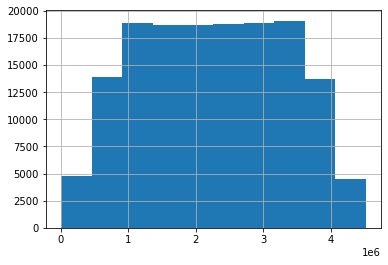

In [29]:
email_data.hist()

### Total data volume (in Bytes) for Socal media

In [30]:
social_data = data['Social Media']
social_data 

0         1570185.0
1         1933278.0
2         1726277.0
3          657493.0
4          912788.0
            ...    
149995     993175.0
149996    3517065.0
149997    2352181.0
149998    1260239.0
149999     823109.0
Name: Social Media, Length: 150000, dtype: float64

In [49]:
social_data.describe()

count    1.500000e+05
mean     1.828250e+06
std      1.035650e+06
min      1.563000e+03
25%      9.322132e+05
50%      1.826442e+06
75%      2.727489e+06
max      3.650861e+06
Name: Social Media, dtype: float64

<AxesSubplot:>

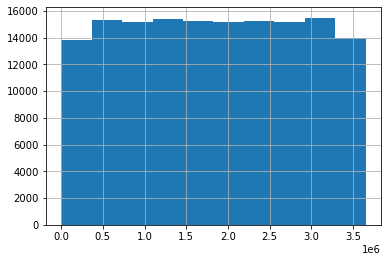

In [31]:
social_data.hist()

#### Total data volume (in Bytes) for Google

In [32]:
google_data = data['Google']
google_data 

0          2905912.0
1          4414096.0
2         10229119.0
3         11811761.0
4          7748843.0
             ...    
149995     1265634.0
149996    12784914.0
149997     4415361.0
149998     6585469.0
149999     7757267.0
Name: Google, Length: 150000, dtype: float64

In [48]:
google_data.describe()

count    1.500000e+05
mean     7.807295e+06
std      3.516432e+06
min      4.033000e+04
25%      4.943592e+06
50%      7.812852e+06
75%      1.068285e+07
max      1.552878e+07
Name: Google, dtype: float64

<AxesSubplot:>

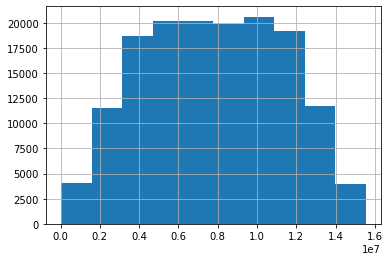

In [34]:
google_data.hist()

In [ ]:
### Total data volume (in Bytes) for Youtube¶

In [35]:
youtube_data = data['Youtube']
youtube_data

0         18355943.0
1         39359124.0
2         34425237.0
3         36534765.0
4         34222253.0
             ...    
149995    24553645.0
149996    27955095.0
149997    22165518.0
149998    24516413.0
149999    17122508.0
Name: Youtube, Length: 150000, dtype: float64

In [36]:
youtube_data.describe()

count    1.500000e+05
mean     2.264348e+07
std      9.246831e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266181e+07
75%      2.929266e+07
max      4.519008e+07
Name: Youtube, dtype: float64

In [47]:
youtube_data.describe()

count    1.500000e+05
mean     2.264348e+07
std      9.246831e+06
min      7.890300e+04
25%      1.599846e+07
50%      2.266181e+07
75%      2.929266e+07
max      4.519008e+07
Name: Youtube, dtype: float64

<AxesSubplot:>

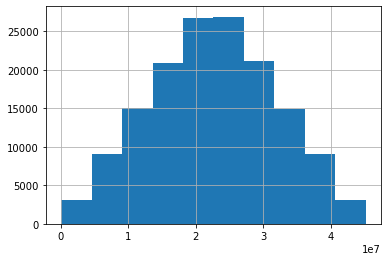

In [37]:
youtube_data.hist()

### Total data volume (in Bytes) for Netflix¶

In [38]:
netflix_data = data['Netflix']
netflix_data

0         17855187.0
1         35565545.0
2         23751202.0
3         15092588.0
4         17539799.0
             ...    
149995    29618711.0
149996    37561864.0
149997    40643294.0
149998    15029702.0
149999    16494842.0
Name: Netflix, Length: 150000, dtype: float64

In [39]:
netflix_data.describe()

count    1.500000e+05
mean     2.262861e+07
std      9.260851e+06
min      9.843200e+04
25%      1.597944e+07
50%      2.263559e+07
75%      2.929060e+07
max      4.519815e+07
Name: Netflix, dtype: float64

In [41]:
netflix_data.describe()

count    1.500000e+05
mean     2.262861e+07
std      9.260851e+06
min      9.843200e+04
25%      1.597944e+07
50%      2.263559e+07
75%      2.929060e+07
max      4.519815e+07
Name: Netflix, dtype: float64

### Total data volume (in Bytes) for Gaming¶

In [42]:
gaming_data = data['Gaming']
gaming_data

0         292426453.0
1         609920783.0
2         229980251.0
3         810387875.0
4         531237049.0
             ...     
149995    797160102.0
149996    535806880.0
149997    631628095.0
149998    566933800.0
149999    355066446.0
Name: Gaming, Length: 150000, dtype: float64

In [45]:
gaming_data.describe()

count    1.500000e+05
mean     4.303331e+08
std      2.440207e+08
min      3.063580e+05
25%      2.187274e+08
50%      4.316152e+08
75%      6.414161e+08
max      8.592028e+08
Name: Gaming, dtype: float64

<AxesSubplot:>

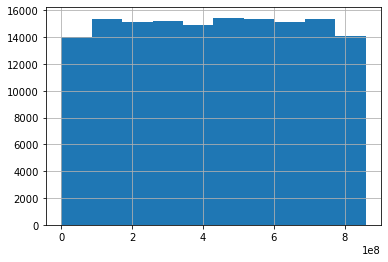

In [46]:
gaming_data.hist()

## Task 2: User Engagement analysis

### Top 10 customers per engagement metric

In [51]:
# top 10 sessions frequency
sessions_frequency = data.groupby('MSISDN/Number')
sessions_frequency = sessions_frequency.agg({"Bearer Id": "count"})
Top10_sessions_frequency = sessions_frequency.sort_values(by='Bearer Id', ascending=False)
Top10_sessions_frequency.head(10)

,Bearer Id
MSISDN/Number,
208201402778052,18
208201007176097,17
208201715944176,17
208201906760163,16
208201009693091,15
208202100881019,15
208200853859127,13
208201771999179,12
208200313716101,12


In [53]:
# duration of the session
session_duration= data.groupby('MSISDN/Number')
session_duration = session_duration.agg({"Dur. (ms)": "sum"})
Top10_session_duration = session_duration.sort_values(by='Dur. (ms)', ascending=False)
session_duration.head(10)

,Dur. (ms)
MSISDN/Number,
204047108489451,869844.0
204080810288647,877385.0
208200101016140,86019.0
208200101127285,86254.0
208200101148045,573923.0
208200101148074,41246.0
208200101148075,372454.0
208200101148136,232058.0
208200101148139,86399.0


In [55]:
#the sessions total traffic (download and upload (bytes))
total_traffic = data.groupby('MSISDN/Number')
total_traffic = total_traffic.agg({"Total": "sum"})
Top10_total_traffic = total_traffic.sort_values(by='Total', ascending=False)
Top10_total_traffic.head(10)

,Total
MSISDN/Number,
208201715944176,8.846226e+09
208202100881019,8.514774e+09
208201007176097,8.499621e+09
208201402778052,7.971167e+09
208201009693091,7.891111e+09
208201906760163,7.705863e+09
208201402604136,7.308501e+09
208200313716101,7.132371e+09
208201714300272,6.872018e+09


In [58]:
# join customers per engagement metric
joined_data =pd.DataFrame(sessions_frequency.join(session_duration, how='left')).join(total_traffic, how='left')
joined_data

,Bearer Id,Dur. (ms),Total
MSISDN/Number,,,
204047108489451,1,869844.0,1.391536e+08
204080810288647,1,877385.0,2.321240e+08
208200101016140,1,86019.0,8.517164e+07
208200101127285,1,86254.0,4.265016e+08
208200101148045,2,573923.0,1.033092e+09
...,...,...,...
208209850788090,1,127367.0,7.227036e+08
208209850788245,1,168543.0,4.958656e+08
208209850788283,1,86399.0,3.381806e+08


In [61]:
joined_data.describe() #describe the joined customers per engagement metric

,Bearer Id,Dur. (ms),Total
count,107265.000000,1.072650e+05,1.072650e+05
mean,1.398406,1.462852e+05,6.932802e+08
std,0.810651,1.866678e+05,4.931042e+08
min,1.000000,7.142000e+03,3.324901e+07
25%,1.000000,7.084700e+04,3.593473e+08
50%,1.000000,1.026600e+05,6.192999e+08
75%,2.000000,1.727990e+05,8.592080e+08
max,18.000000,1.855375e+07,8.846226e+09


### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [66]:
k = 3
cols_to_standardize = ['Bearer Id',  'Dur. (ms)', 'Total']
data_to_standardize = joined_data[cols_to_standardize]

# Create the scaler.
scaler = StandardScaler().fit(data_to_standardize)

# Standardize the data
standardized_data = joined_data.copy()
standardized_columns = scaler.transform(data_to_standardize)
standardized_data[cols_to_standardize] = standardized_columns

print('Sample of data to use:')
print(standardized_data.sample(5), '\n')

model = KMeans(n_clusters = k).fit(standardized_data)

joined_data['cluster'] = model.predict(standardized_data)

print('Cluster summary:')
summary = joined_data.groupby(['cluster']).mean()
summary['count'] = joined_data['cluster'].value_counts()
summary = summary.sort_values(by='count', ascending=False)
print(summary)

Sample of data to use:
                 Bearer Id  Dur. (ms)     Total
MSISDN/Number                                  
208201446324195  -0.491466  -0.655190  0.270678
208201909830115   0.742116  -0.149122  1.448234
208201546098242  -0.491466  -0.320813 -0.287602
208201402754284   0.742116   0.405946  1.168944
208202201148237  -0.491466  -0.693927 -0.753172 

Cluster summary:
         Bearer Id      Dur. (ms)         Total  count
cluster                                               
2         1.028200  103073.550474  4.949413e+08  79893
0         2.186554  214180.787672  1.117907e+09  23784
1         4.417224  658403.854515  2.294889e+09   3588


### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [69]:
# total traffic per application for email
group_data = data.groupby('MSISDN/Number')
email_traffic = group_data.agg({"Email": "sum"})
Top10_email_traffic = email_traffic.sort_values(by='Email', ascending=False)
Top10_email_traffic.head(10)

,Email
MSISDN/Number,
208201402778052,42418782.0
208201715944176,40788634.0
208201007176097,40633966.0
208201716367238,36310123.0
208201906760163,35999792.0
208202100881019,33693767.0
208201009693091,31514421.0
208201007286206,30417885.0
208200853859127,30335796.0


In [71]:
# total traffic per application for google
group_data = data.groupby('MSISDN/Number')
google_traffic = group_data.agg({'Google': "sum"})
Top10_google_traffic = google_traffic.sort_values(by='Google', ascending=False)
Top10_google_traffic.head(10)

,Google
MSISDN/Number,
208201402778052,152191852.0
208201007176097,142307915.0
208201715944176,127973787.0
208202100881019,123223099.0
208201906760163,116516345.0
208201716367238,110254484.0
208201009693091,109860502.0
208200853859127,105032696.0
208202101287048,97089988.0


In [72]:
# total traffic per application for social media
group_data = data.groupby('MSISDN/Number')
social_traffic = group_data.agg({'Social Media': "sum"})
Top10_social_traffic = social_traffic.sort_values(by='Social Media', ascending=False)
Top10_social_traffic.head(10)

,Social Media
MSISDN/Number,
208201402778052,43374779.0
208202100881019,39783189.0
208201906760163,35412358.0
208201715944176,28294544.0
208201007176097,27135500.0
208200853859127,24247850.0
208201716367238,23974919.0
208201771676245,23800834.0
208201907543212,23077825.0


In [73]:
# total traffic per application for youtube
group_data = data.groupby('MSISDN/Number')
youtube_traffic = group_data.agg({'Youtube': "sum"})
Top10_youtube_traffic = youtube_traffic.sort_values(by='Youtube', ascending=False)
Top10_youtube_traffic.head(10)

,Youtube
MSISDN/Number,
208201007176097,452958769.0
208202100881019,396289198.0
208201715944176,394370218.0
208201402778052,374483047.0
208201009693091,317410572.0
208200853859127,315231310.0
208201771999179,308790774.0
208200313716101,303169107.0
208201545274157,302661958.0


In [74]:
# total traffic per application for netflix
group_data = data.groupby('MSISDN/Number')
netflix_traffic = group_data.agg({'Netflix': "sum"})
Top10_netflix_traffic = netflix_traffic.sort_values(by='Netflix', ascending=False)
Top10_netflix_traffic.head(10)

,Netflix
MSISDN/Number,
208201906760163,399519079.0
208201715944176,361401046.0
208201007176097,356980607.0
208202100881019,334643269.0
208201402778052,328725740.0
208200313716101,318347546.0
208200853859127,313939488.0
208201009693091,309093159.0
208201716367238,305939790.0


In [75]:
# total traffic per application for gaming
group_data = data.groupby('MSISDN/Number')
gaming_traffic = group_data.agg({'Gaming': "sum"})
Top10_gaming_traffic = gaming_traffic.sort_values(by='Gaming', ascending=False)
Top10_gaming_traffic.head(10)

,Gaming
MSISDN/Number,
208201715944176,7.749432e+09
208202100881019,7.461045e+09
208201007176097,7.326673e+09
208201009693091,6.970568e+09
208201402778052,6.887572e+09
208201906760163,6.725559e+09
208201402604136,6.646303e+09
208200313716101,6.268620e+09
208201714300272,6.103856e+09


In [77]:
# total traffic per application for other
group_data = data.groupby('MSISDN/Number')
other_traffic = group_data.agg({'Other': "sum"})
Top10_other_traffic = other_traffic.sort_values(by='Other', ascending=False)
Top10_other_traffic.head(10)

,Other
MSISDN/Number,
208201402778052,8.167878e+09
208201715944176,7.639264e+09
208201009693091,6.798515e+09
208201007176097,6.354583e+09
208201907543212,6.326671e+09
208201906760163,6.317415e+09
208201544311292,5.305448e+09
208201771999179,5.117791e+09
208202101287048,5.077779e+09


### Top 3 most used application

In [80]:
all_application = data[[ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']].sum()

In [91]:
all_application(3)

TypeError: 'Series' object is not callable

<AxesSubplot:>

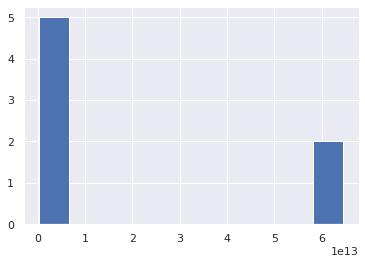

In [83]:
#x= joined_data[''].value_counts().head(3)
all_application.hist()

<AxesSubplot:ylabel='None'>

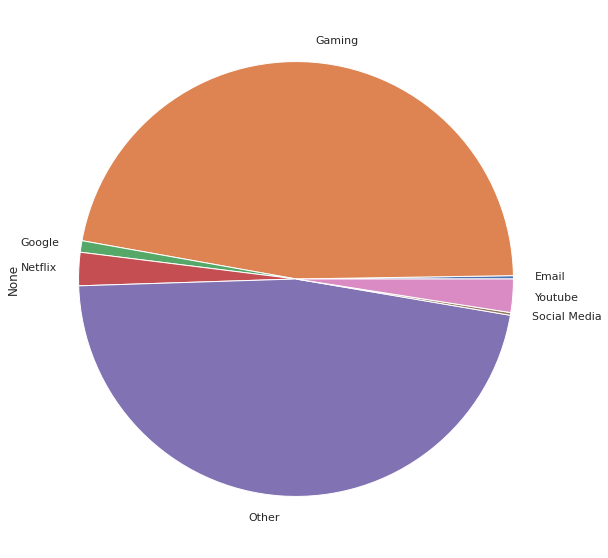

In [90]:
all_application.groupby([ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']).sum().plot(kind='pie', \
                                            figsize=(15,10))

<AxesSubplot:ylabel='None'>

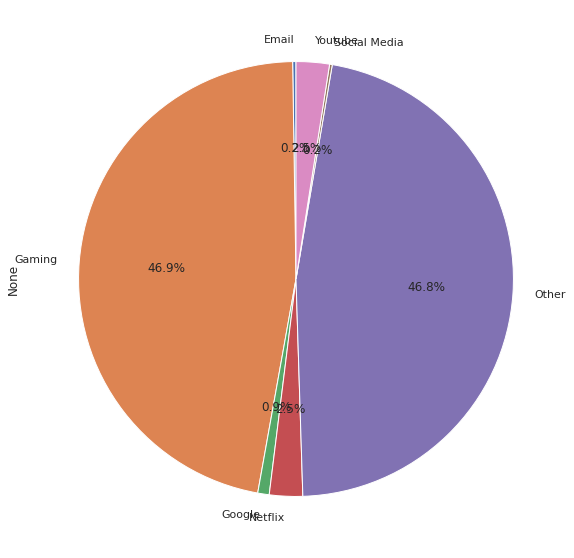

In [88]:
all_application.groupby([ 'Social Media','Google', 'Email','Youtube','Netflix','Gaming','Other']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,
figsize=(15,10), autopct='%1.1f%%')